<a href="https://colab.research.google.com/github/mohammad-abdollahi/motion-sense-data-analysis-with-deep-learning/blob/master/main_motion_sense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#prepare data


In [0]:
!wget https://github.com/mmalekzadeh/motion-sense/blob/master/data/A_DeviceMotion_data.zip?raw=true

--2020-02-10 20:43:31--  https://github.com/mmalekzadeh/motion-sense/blob/master/data/A_DeviceMotion_data.zip?raw=true
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mmalekzadeh/motion-sense/raw/master/data/A_DeviceMotion_data.zip [following]
--2020-02-10 20:43:32--  https://github.com/mmalekzadeh/motion-sense/raw/master/data/A_DeviceMotion_data.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mmalekzadeh/motion-sense/master/data/A_DeviceMotion_data.zip [following]
--2020-02-10 20:43:32--  https://raw.githubusercontent.com/mmalekzadeh/motion-sense/master/data/A_DeviceMotion_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (ra

In [0]:
!unzip 'A_DeviceMotion_data.zip'

Archive:  A_DeviceMotion_data.zip
   creating: A_DeviceMotion_data/
   creating: A_DeviceMotion_data/dws_11/
  inflating: A_DeviceMotion_data/dws_11/sub_12.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_1.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_13.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_11.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_2.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_3.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_10.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_14.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_7.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_6.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_15.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_17.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_4.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_5.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_16.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_8.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_9.csv  

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
import sklearn
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import itertools
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./A_DeviceMotion_data"))

['wlk_15', 'jog_16', 'ups_4', 'std_14', 'dws_1', 'jog_9', 'wlk_7', 'dws_2', 'sit_13', 'ups_12', 'wlk_8', 'ups_3', 'dws_11', 'sit_5', 'std_6']


In [0]:
Folders = glob('./A_DeviceMotion_data/*_*')
Folders = [s for s in Folders if "csv" not in s]
print(Folders)

Df_all_list = []
Exp = 0
# Segment the data to 400 sampels frames , each one will be a different Expirament
Segment_Size = 200

# Activety types dict:
activity_codes = {'dws':1,'jog':2,'sit':3,'std':4,'ups':5,'wlk':6}        
activity_types = list(activity_codes.keys())

# Load All data:
for j  in Folders:
    Csv = glob(j + '/*' )


    for i in Csv:
        df = pd.read_csv(i)
        # Add Activety label, Subject name and Experiment number
        print(j)
        df['Activity'] = activity_codes[j[22:25]]
        df['Sub_Num'] = i[len(j)+5:-4]
        df['Exp_num'] = 1
        ExpNum = np.zeros((df.shape[0])) 
        for i in range(0,df.shape[0]-Segment_Size,Segment_Size):
            ExpNum[range(i,i+Segment_Size)] = i/Segment_Size +Exp*100 
        df['Exp_num'] = ExpNum
        
        #Df_all = pd.concat([Df_all,df])
        Df_all_list.append(df)
        Exp += 1        

Df_all = pd.concat(Df_all_list,axis=0)  
print(Df_all.shape)
print(Df_all.columns)

['./A_DeviceMotion_data/wlk_15', './A_DeviceMotion_data/jog_16', './A_DeviceMotion_data/ups_4', './A_DeviceMotion_data/std_14', './A_DeviceMotion_data/dws_1', './A_DeviceMotion_data/jog_9', './A_DeviceMotion_data/wlk_7', './A_DeviceMotion_data/dws_2', './A_DeviceMotion_data/sit_13', './A_DeviceMotion_data/ups_12', './A_DeviceMotion_data/wlk_8', './A_DeviceMotion_data/ups_3', './A_DeviceMotion_data/dws_11', './A_DeviceMotion_data/sit_5', './A_DeviceMotion_data/std_6']
./A_DeviceMotion_data/wlk_15
./A_DeviceMotion_data/wlk_15
./A_DeviceMotion_data/wlk_15
./A_DeviceMotion_data/wlk_15
./A_DeviceMotion_data/wlk_15
./A_DeviceMotion_data/wlk_15
./A_DeviceMotion_data/wlk_15
./A_DeviceMotion_data/wlk_15
./A_DeviceMotion_data/wlk_15
./A_DeviceMotion_data/wlk_15
./A_DeviceMotion_data/wlk_15
./A_DeviceMotion_data/wlk_15
./A_DeviceMotion_data/wlk_15
./A_DeviceMotion_data/wlk_15
./A_DeviceMotion_data/wlk_15
./A_DeviceMotion_data/wlk_15
./A_DeviceMotion_data/wlk_15
./A_DeviceMotion_data/wlk_15
./A_De

In [0]:
Df_all.head

<bound method NDFrame.head of       Unnamed: 0  attitude.roll  attitude.pitch  ...  Activity  Sub_Num  Exp_num
0              0       0.320966       -1.185376  ...         6        3      0.0
1              1       0.309780       -1.194660  ...         6        3      0.0
2              2       0.292629       -1.209627  ...         6        3      0.0
3              3       0.281451       -1.235911  ...         6        3      0.0
4              4       0.291753       -1.269970  ...         6        3      0.0
...          ...            ...             ...  ...       ...      ...      ...
9829        9829       1.766039       -1.034707  ...         4       14      0.0
9830        9830       1.765951       -1.034233  ...         4       14      0.0
9831        9831       1.765106       -1.033638  ...         4       14      0.0
9832        9832       1.763339       -1.032973  ...         4       14      0.0
9833        9833       1.760536       -1.032393  ...         4       14      0.

In [0]:
### Missing values
checks = pd.isna(Df_all).sum()
print(checks)


#  Calculate features
df_sum = Df_all.groupby('Exp_num', axis=0).mean().reset_index()
df_sum.columns = df_sum.columns.str.replace('.','_sum_')

df_sum_SS = np.power(Df_all.astype(float),2).groupby('Exp_num', axis=0).median().reset_index() 
df_sum_SS.columns = df_sum_SS.columns.str.replace('.','_sumSS_')

df_max = Df_all.groupby('Exp_num', axis=0).max().reset_index()
df_max.columns = df_max.columns.str.replace('.','_max_')

df_min = Df_all.groupby('Exp_num', axis=0).min().reset_index()
df_min.columns = df_min.columns.str.replace('.','_min_')

df_skew = Df_all.groupby('Exp_num', axis=0).skew().reset_index()
df_skew.columns = df_skew.columns.str.replace('.','_skew_')

df_std = Df_all.groupby('Exp_num', axis=0).std().reset_index()
df_std.columns = df_std.columns.str.replace('.','_std_')

Df_Features = pd.concat([ df_max , df_sum[df_sum.columns[2:-2]], 
                         df_min[df_min.columns[2:-2]], df_sum_SS[df_sum_SS.columns[2:-2]], 
                         df_std[df_std.columns[2:-2]], df_skew[df_skew.columns[2:-2]]], axis=1)

X = Df_Features.drop(['Exp_num','Unnamed: 0','Activity','Sub_Num'],axis=1)
Y = Df_Features['Activity']

print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)

Unnamed: 0            0
attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
Activity              0
Sub_Num               0
Exp_num               0
dtype: int64
Shape of X: (6886, 70)
Shape of Y: (6886,)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

a = X_train.as_matrix()
b = Y_train.as_matrix()
a_test = X_train.as_matrix()
b_test = Y_train.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


#neural network

In [0]:
# making model
num_input = 6886
num_classes = 7
display_step = 100

def neural_net(x_dict, params):
    # extracting parameters and features
    x = x_dict['data']
    n_hidden = params['n_hidden']
    hidden_units = params['hidden_units']
    
    
    layer_1 = tf.layers.dense(x, n_hidden)

    layer_2 = tf.layers.dense(layer_1, n_hidden)
    
    if(hidden_units == 2):
      out_layer = tf.layers.dense(layer_2, num_classes)
      return out_layer
    
    layer_3 = tf.layers.dense(layer_2, n_hidden)
    
    if(hidden_units == 3):
      out_layer = tf.layers.dense(layer_3, num_classes)
      return out_layer
    
    layer_4 = tf.layers.dense(layer_3, n_hidden)
    
    if(hidden_units == 4):
      out_layer = tf.layers.dense(layer_4, num_classes)
      return out_layer
    

def model_fn(features, labels, mode, params):
    learning_rate = params['learning_rate']
    optim = params['optimizer']
    
    logits = neural_net(features, params)

    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)

    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes)
            
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)))
    if(optim == "adam"):
      optimizer = tf.train.AdamOptimizer(learning_rate)
    if(optim == "gradient descent"):
      optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    if(optim == "ada"):
      optimizer = tf.train.AdagradOptimizer(learning_rate)
    
    tf.summary.scalar('loss', loss_op) 
    train_op = optimizer.minimize(loss_op,
                                  global_step=tf.train.get_global_step())

    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    #logging_hook = tf.train.LoggingTensorHook({"loss": total_loss}, every_n_iter=10)
    
    estim_specs = tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=pred_classes,
        loss=loss_op,
        train_op=train_op,
        eval_metric_ops={'accuracy': acc_op})       
    
    return estim_specs

In [0]:
maximum = 0
best_hidden_unit = 0
best_n_hidden = 0
best_lr = 0
best_Epoch = 0
best_numStep = 0
best_batch = 0


hidden_units = [2, 3 , 4]
n_hidden = [128, 256, 512]
learning_rate = [0.1, 1e-3, 1e-4]
Epochs = [1000]
Num_S = [1000, 1500]
batch_size = [128, 256, 512]





for i in Epochs:
  for j in Num_S:
    for k in batch_size:
      for l in hidden_units:
        for m in n_hidden:
          for n in learning_rate:
            input_fn = tf.estimator.inputs.numpy_input_fn(
                x={'data':a}, y=b,
                batch_size=k, num_epochs=i, shuffle=True)

            model = tf.estimator.Estimator(model_fn,  params={
                  'hidden_units': l,
                  'n_hidden': m,
                  'learning_rate':n,
                  'optimizer':'adam'
              })

            # Train the Model
            model.train(input_fn, steps=j)

            # Evaluate the Model
            # Define the input function for evaluating

            input_fn = tf.estimator.inputs.numpy_input_fn(
                x={'data': a_test}, y=b_test,
                batch_size=k, shuffle=False)
            # Use the Estimator 'evaluate' method
            e = model.evaluate(input_fn)

            if(e['accuracy']>maximum):
              best_Epoch = i
              best_numStep = j
              best_batch = k
              best_hidden_unit = l
              best_n_hidden = m
              best_lr = n
              maximum = e['accuracy']

            print("Testing Accuracy:", e['accuracy'])

#f'best accuracy {maximum} best batch size {best_batch}  best number of steps {best_numStep}  best number of epochs {best_Epoch} best number of hidden unit {best_hidden_unit} best number of nodes {best_n_hidden} best number of learning rate {}'


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpxq3dljvo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f1ccfcad710>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done c

In [0]:
f'best accuracy {maximum} best batch size {best_batch}  best number of steps {best_numStep}  best number of epochs {best_Epoch} best number of hidden unit {best_hidden_unit} best number of nodes {best_n_hidden} best number of learning rate {best_lr}'


'best accuracy 0.9800290465354919 best batch size 512  best number of steps 1500  best number of epochs 1000 best number of hidden unit 2 best number of nodes 128 best number of learning rate 0.001'

In [0]:
model = tf.estimator.Estimator(model_fn,  params={
            'hidden_units': 2,
            'n_hidden': 128,
            'learning_rate':1e-3,
            'optimizer':'adam'
        })



#e = model.evaluate(input_fn)
#loss_log.append(e['loss'])
#acc_log.append(e['accuracy'])

input_fn = tf.estimator.inputs.numpy_input_fn(
          x={'data':a}, y=b,
          batch_size=512, num_epochs=1000, shuffle=True)

# Train the Model
f = model.train(input_fn, steps=1500)

# Evaluate the Model
# Define the input function for evaluating

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'data': a_test}, y=b_test,
    batch_size=512, shuffle=False)
# Use the Estimator 'evaluate' method
e = model.evaluate(input_fn)

print("Testing Accuracy:", e['accuracy'])
print("Testing Loss:", e['loss'])

predictions = list(model.predict(input_fn))

print(sklearn.metrics.classification_report(b_test, predictions))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpejvyxzn9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f15c4048470>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done c

#check results

Confusion matrix, without normalization
[[ 463    0    0    1   22   11]
 [   0  528    0    0    0    0]
 [   0    0 1321    0    0    0]
 [   0    0    0 1204    1    3]
 [  17    1    0    1  556   17]
 [  24    2    0    0   31 1305]]


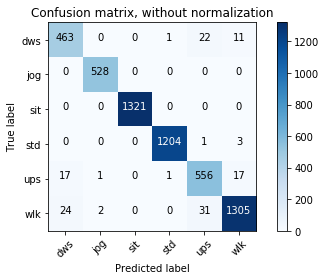

In [0]:
#ii
# confusion matrix
activity_types = ['dws', 'jog', 'sit', 'std', 'ups', 'wlk']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    function provided by sklearn example
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix( predictions, b_test)
plot_confusion_matrix(cnf_matrix, classes=activity_types,
                      title='Confusion matrix, without normalization')

#dimension reduction

Text(0.5, 1.0, 'TSNE')

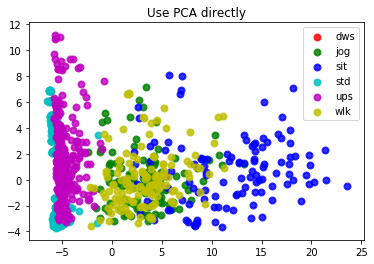

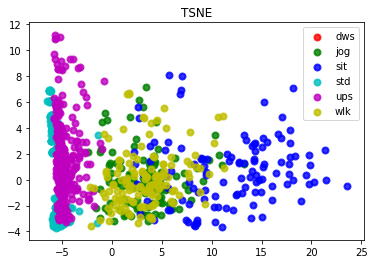

In [0]:
# iv and v
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

activity_types = ['dws', 'jog', 'sit', 'std', 'ups', 'wlk']

#tes = pd.read_csv('Test_no_Ac.csv')

#### dimension reduction
### use pca to reduce the dimension to 2D directly.
pca = PCA(n_components=2)
X_r = pca.fit(X_test).transform(X_test)

plt.figure(1)
colors = ['r','g','b','c','m','y','k']
lw = 2

for color, i, target_name in zip(colors, range(6), activity_types):
    plt.scatter(X_r[Y_test == i, 0], X_r[Y_test == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Use PCA directly')

### sklearn tsne
# sites.google.com/s/1HAV-HEiBhPHLgdh5Ejmu31TrVIQqw9HU/p/1bPpOCDlxW7i5nOpy3bvpnmkqa8Y-SDVa/edit
# Scale data
scl = StandardScaler()
scaled_X = scl.fit_transform(X_test)

# Reduce dimensions before feeding into tsne
pca = PCA(n_components=0.9, random_state=3)
pca_transformed = pca.fit_transform(scaled_X)

# Transform data
tsne = TSNE(random_state=42)
tsne_transformed = tsne.fit_transform(scaled_X)

plt.figure(2)
for color, i, target_name in zip(colors, range(7), activity_types):
    plt.scatter(X_r[Y_test == i, 0], X_r[Y_test == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('TSNE')